                                     Michał Ciesielski
__Table of contents:__

- [Project Motivation](#project-motivation)

- [The dataset](#the-dataset)

- [Analysis Plan](#analysis-plan)

- [Performance Metrics](#performance-metrics)

- [Exploratory Data Analysis](#exploratory-data-analysis)

- [Exploratory Data Analysis Summary](#exploratory-data-analysis-summary)

- [Model development](#model-development)

- [Conclusion and recommendations](#conclusion-and-recommendations)

- [References](#References)

# Project Motivation <a class="anchor" id="project-motivation"></a>
A Polish dealer of BMW cars wants to know how much should be the price of cars company in his car dealership XYZ. Specifically, he wants to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Polish market. The principal wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

The main goal of my project is to find some factors which impact on price of cars in general. Most of the people is buying used cars nowadays. The people want to buy the cheapest car with the highest possible quality. How does it accord to several years old BMW models? I will try to find a proper way to solve this problem based on that car company. 

Many people are interested in a few years old cars because they're not too expensive and there is some information from previous owners about the car. However, I have only general specification of cars, like mileage, size of engine or type of fuel. The information about potentially damage of a car doesn't exist. But assuming that the cars are only a few years old, I will try to build a solid predictive model of the price of usage BMW car, trained on features available in the given dataset.

# The dataset <a class="anchor" id="the-dataset"></a>
The data used in this project can be obtained from the site: https://github.com/datacamp/careerhubdata/tree/master/BMW%20Used%20Car%20Sales. The file contains information for price, transmission, mileage, fuel type, road tax, miles per gallon (mpg) and engine size of some BMW cars, probably available in a web service.

## Data description
The data consists of 8 input variables and a numerical target variable (price of a car) with wide range of possible values.

### Attribute Information - features
|| Description | Type|
|--------|--------------------|---------|
|M| model | categorical |
|Y| year of production   | categorical |
|T|car transmission |categorical|
|MA|mileage| numerical|
|F|type of fuel | categorical|
|P|vehicle tax |numerical|
|MPG|usage of fuel | numerical|
|EE|size of an engine | numerical|

### Attribute Information - Target
| Description | Type|
|--------------------|---------|
| price of a car | numerical |

# Analysis Plan <a class="anchor" id="analysis-plan"></a>
This is a supervised, multiple linear regression problem. This is not a classification problem because the dependent variable is numerical. Multiple variables can be part of a model which fits the given data the best.

The following steps will be followed:

Identify suitable performance metrics based on what is known about the problem at this stage.

Exploratory data analysis to identify data problems and discover any initial insights.

Select a suitable algorithm based on the information gained during exploratory analysis.

Fit, fine tune, evaluate and validate a model.

Discuss the merits of and improvements of the model

# Performance Metrics <a class="anchor" id="performance-metrics"></a>
The information included in the description of the dataset does not give any specifics regarding the evaluation of the predictive model’s performance.

A final decision will be made following an initial exploration of the data to decide which performance metrics are suitable.

__R-squared and adjusted R-squared__

R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. I will check the value and try to find a model with the biggest value of variance explained. 

__F-stats and Prob(F-stats) (overall model fit)__

The p-value of the F-test which is the test of significance for entire model. Null hypothesis assumes that all the coefficients of independent variables are equal to zero. With the big value of F-stat and small value of p-value I can reject the null hypothesis and assume that new model is statistically significant.

__P-values of T-test__

P-values for all the coefficients have to to be less than the significance level of 0.05 - meaning that all the predictors are statistically significant.

__Variance Inflation Factor (VIF)__

Measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

# Exploratory Data Analysis <a class="anchor" id="exploratory-data-analysis"></a>
In this section, an initial exploratory analysis of the dataset will be done. The dataset will be
evaluated for any data quality problems that have to be resolved.

In [ ]:
# Import modules needed exploratory analysis
library(tidyverse)
library(gridExtra)
library(ggplot2)

In [9]:
# Import and check the automatically assigned data types
data <- read.csv("bmw.csv", header = TRUE)
str(data) 
data
data[data$model=='7 Series', ]

'data.frame':	10781 obs. of  9 variables:
 $ model       : Factor w/ 24 levels " 1 Series"," 2 Series",..: 5 6 5 1 7 5 5 2 4 5 ...
 $ year        : int  2014 2018 2016 2017 2014 2016 2017 2018 2017 2016 ...
 $ price       : int  11200 27000 16000 12750 14500 14900 16000 16250 14250 14250 ...
 $ transmission: Factor w/ 3 levels "Automatic","Manual",..: 1 1 1 1 1 1 1 2 2 1 ...
 $ mileage     : int  67068 14827 62794 26676 39554 35309 38538 10401 42668 36099 ...
 $ fuelType    : Factor w/ 5 levels "Diesel","Electric",..: 1 5 1 1 1 1 1 5 1 1 ...
 $ tax         : int  125 145 160 145 160 125 125 145 30 20 ...
 $ mpg         : num  57.6 42.8 51.4 72.4 50.4 60.1 60.1 52.3 62.8 68.9 ...
 $ engineSize  : num  2 2 3 1.5 3 2 2 1.5 2 2 ...


model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [5]:
dim(data)

[1] 10781     9

In [7]:
library(psych)

In [8]:
describe(data)
summary(data$model)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
model*,1,10781,6.734904,6.760221e+00,3.0,5.772870,2.96520,1.0,24.0,23.0,1.0954517,-0.4406012,6.510755e-02
year,2,10781,2017.078935,2.349038e+00,2017.0,2017.355478,2.96520,1996.0,2020.0,24.0,-1.7886611,7.1597166,2.262354e-02
price,3,10781,22733.408867,1.141553e+04,20462.0,21275.569159,9515.32680,1200.0,123456.0,122256.0,1.5864449,4.0177642,1.099427e+02
transmission*,4,10781,2.099991,8.692975e-01,2.0,2.124986,1.48260,1.0,3.0,2.0,-0.1943501,-1.6494311,8.372187e-03
mileage,5,10781,25496.986550,2.514319e+04,18347.0,21689.764058,21214.52340,1.0,214000.0,213999.0,1.3827157,2.2234408,2.421536e+02
fuelType*,6,10781,2.333364,1.853240e+00,1.0,2.166725,0.00000,1.0,5.0,4.0,0.7052012,-1.4640278,1.784852e-02
tax,7,10781,131.702068,6.151076e+01,145.0,134.249275,7.41300,0.0,580.0,580.0,0.8275981,9.2515545,5.924088e-01
mpg,8,10781,56.399035,3.133696e+01,53.3,53.514736,13.63992,5.5,470.8,465.3,9.6265547,120.3800387,3.018056e-01
engineSize,9,10781,2.167767,5.520538e-01,2.0,2.141414,0.00000,0.0,6.6,6.6,0.8512853,2.4358931,5.316819e-03


1 Series  2 Series  3 Series  4 Series  5 Series  6 Series  7 Series  8 Series 
     1969      1229      2443       995      1056       108       106        39 
       i3        i8        M2        M3        M4        M5        M6        X1 
       43        17        21        27       125        29         8       804 
       X2        X3        X4        X5        X6        X7        Z3        Z4 
      288       551       179       468       106        55         7       108

In [83]:
# Check for missing values
print("Count of missing values in each column of the dataset:")
table(is.na(data))
print("The missing values don't exist")

[1] "Count of missing values in each column of the dataset:"



FALSE 
97029 

[1] "The missing values don't exist"


In the data doesn't occur any huge errors. But as I can see in the descprition part, there will be some outliers. It's especially visible in the mpg column where the skewness and kurtosis are huge. However, due to the fact of big size of teh dataset, the outliers won't be harmful.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1200   14950   20462   22733   27940  123456 

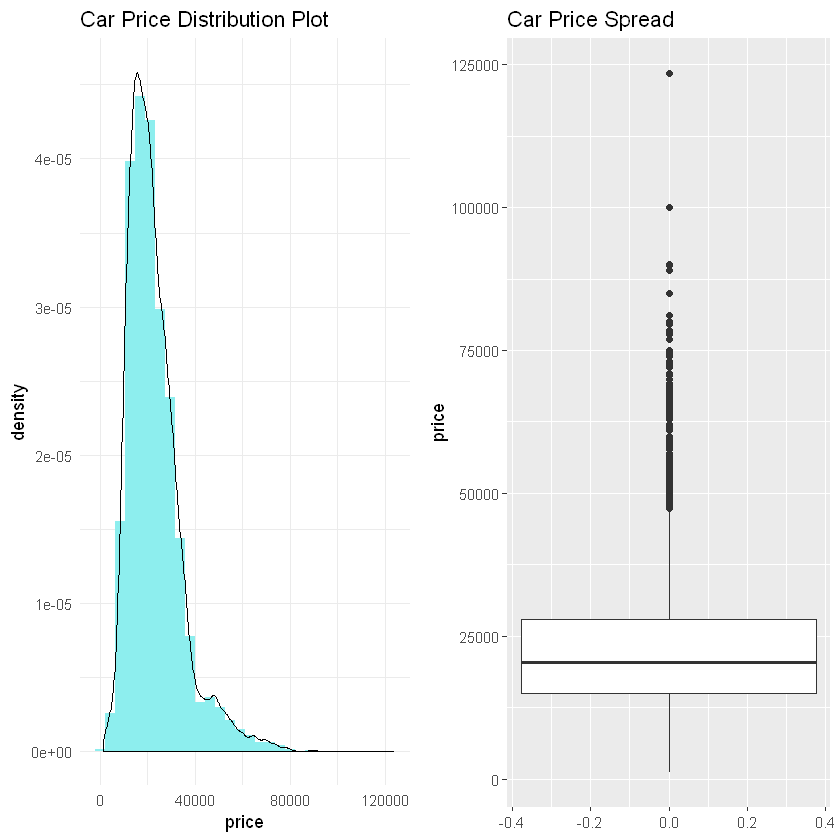

In [12]:
p1 <- ggplot(data) +
  aes(x = price) +
  geom_histogram(aes(y=..density..), bins = 30L, fill="darkslategray2") +
  geom_density(alpha=0.2) +
  theme_minimal() +
  ggtitle("Car Price Distribution Plot")
p2 <- ggplot(data, aes(y=price)) + 
      geom_boxplot() +
      ggtitle("Car Price Spread")
grid.arrange(p1, p2, nrow = 1)
print('Summary of the price')
summary(data$price)

__Inference:__

1. The plot is right-skewed. It means that the most prices in the dataset are under 30000.
2. The outliers represent the luxury models which prices are higher than 50000,
3. The data points are largely spread out, especially more expensive models. It indicates a high variance in the car prices.

__Visualising categorical data:__

- model
- year of production
- car transmission
- type of fuel

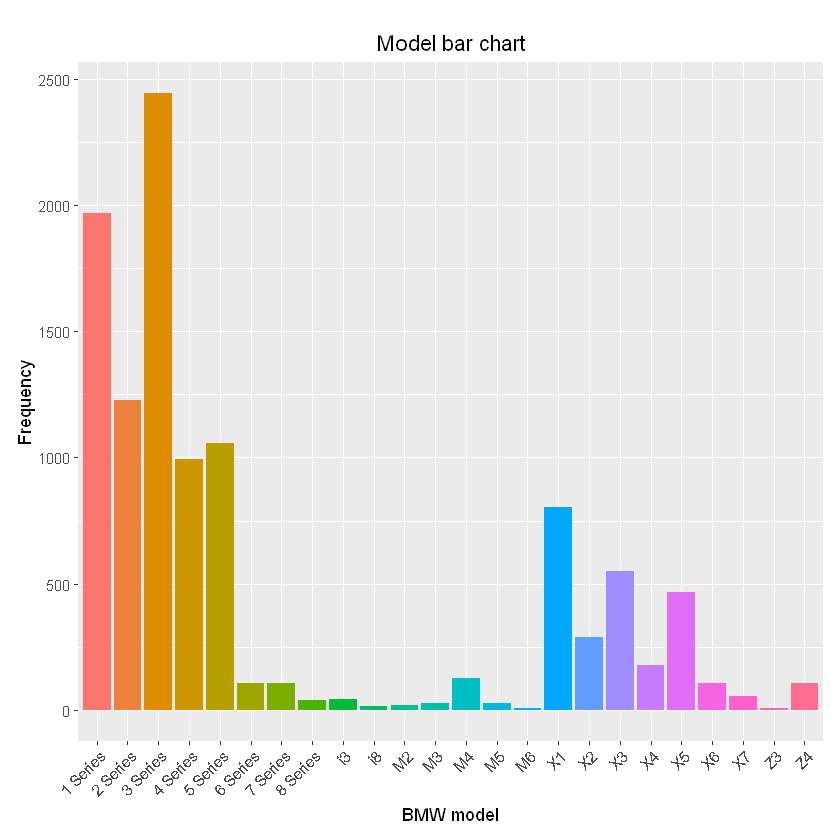

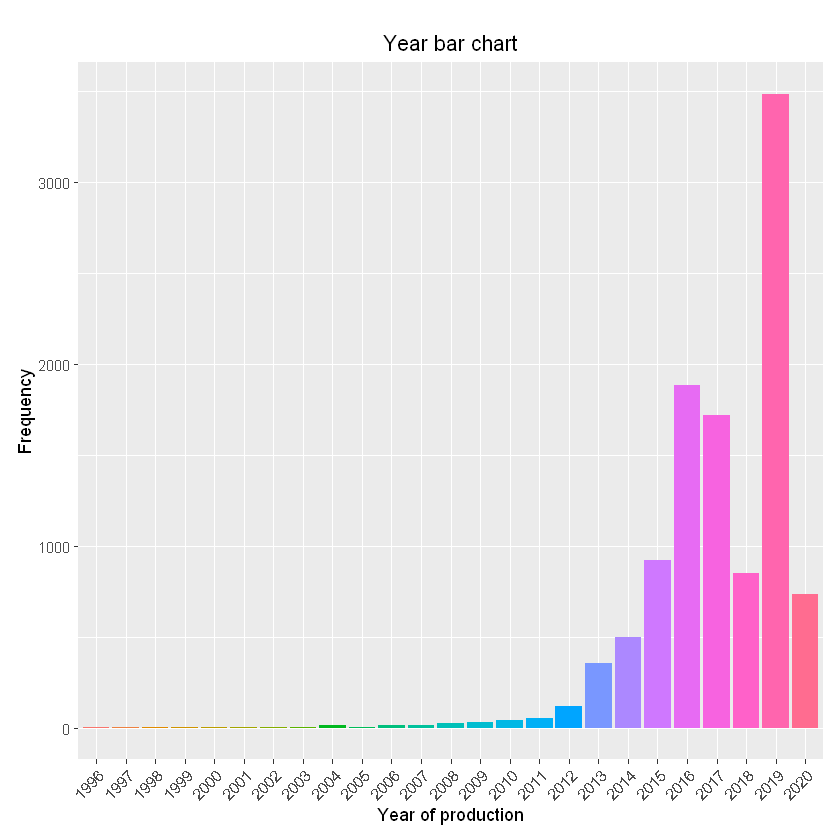

In [59]:
p <- ggplot(data, aes(x = model, fill=model)) +
    geom_bar() +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust = 1),
          plot.margin = margin(t = 20, r = 10, b = 10, l = 10),
          legend.position = "none") +
    xlab('BMW model') +
    ylab('Frequency') +
    ggtitle('Model bar chart') +
    theme(plot.title = element_text(hjust = 0.5))
p
y <- ggplot(data, aes(x = factor(year), fill=factor(year))) +
    geom_bar() +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust = 1),
          plot.margin = margin(t = 20, r = 10, b = 10, l = 10),
          legend.position = "none") +
    xlab('Year of production') +
    ylab('Frequency') +
    ggtitle('Year bar chart') +
    theme(plot.title = element_text(hjust = 0.5))
y

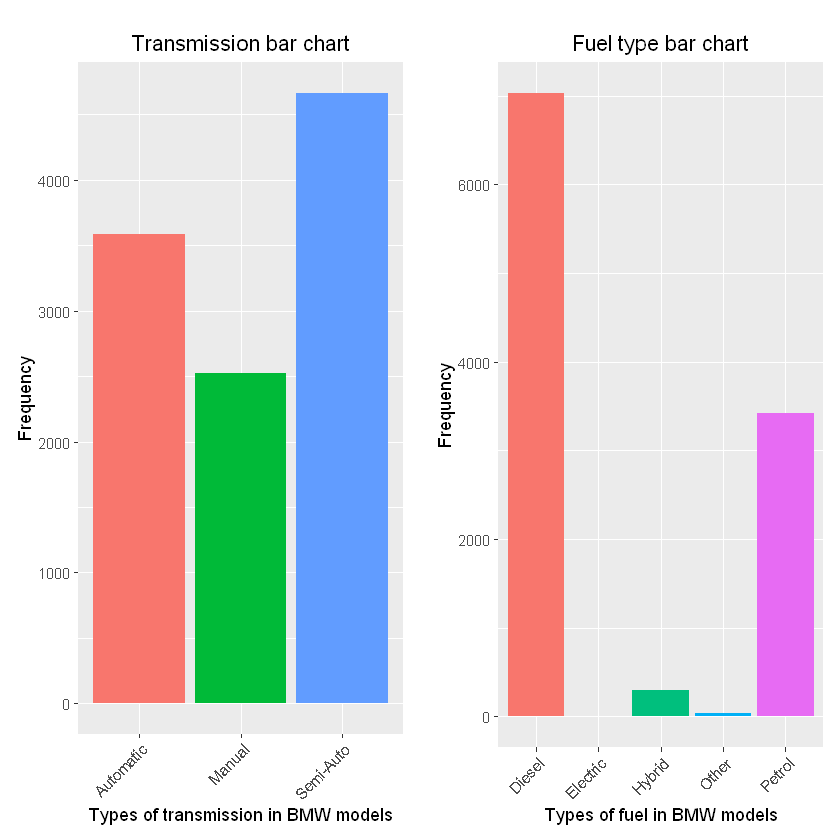

In [61]:
t <- ggplot(data, aes(x = transmission, fill=transmission)) +
    geom_bar() +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust = 1),
          plot.margin = margin(t = 20, r = 10, b = 10, l = 10),
          legend.position = "none") +
    xlab('Types of transmission in BMW models') +
    ylab('Frequency') +
    ggtitle('Transmission bar chart') +
    theme(plot.title = element_text(hjust = 0.5))

f <- ggplot(data, aes(x = fuelType, fill=factor(fuelType))) +
    geom_bar() +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust = 1),
          plot.margin = margin(t = 20, r = 10, b = 10, l = 10),
          legend.position = "none") +
    xlab('Types of fuel in BMW models') +
    ylab('Frequency') +
    ggtitle('Fuel type bar chart') +
    theme(plot.title = element_text(hjust = 0.5))
grid.arrange(t, f, nrow = 1)

__Inference:__

1. The "X Series" models are the most popular in group of BMW cars.
2. Almost every car in the dataset was produced in the last decade.
3. Semi-auto is the most popular type of transmission in modern BMW cars.
4. Number of diesel fueled cars are more than petrol.

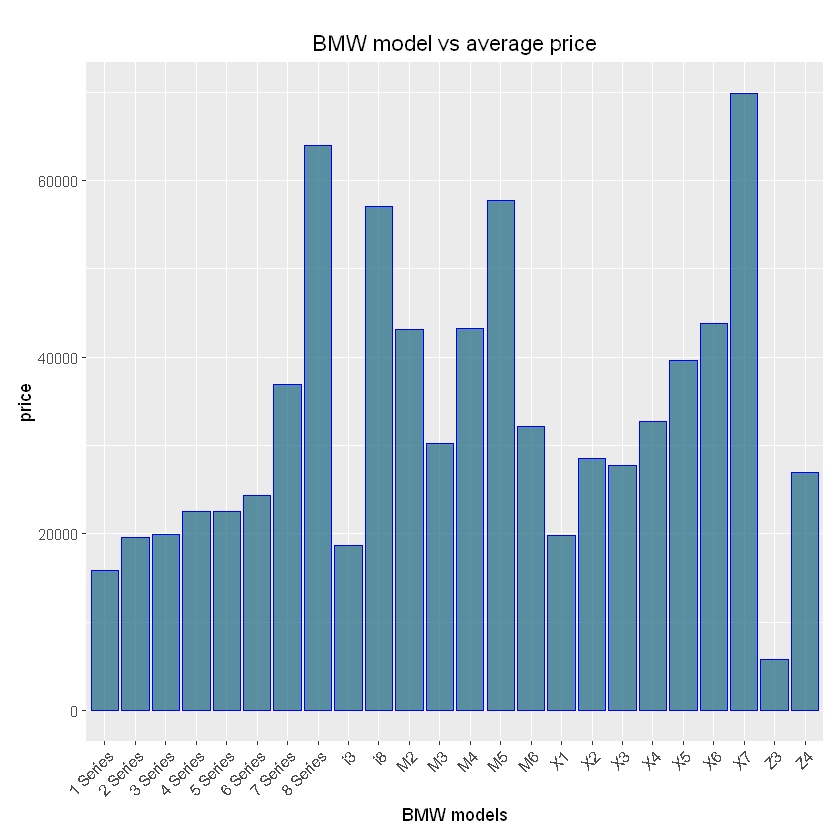

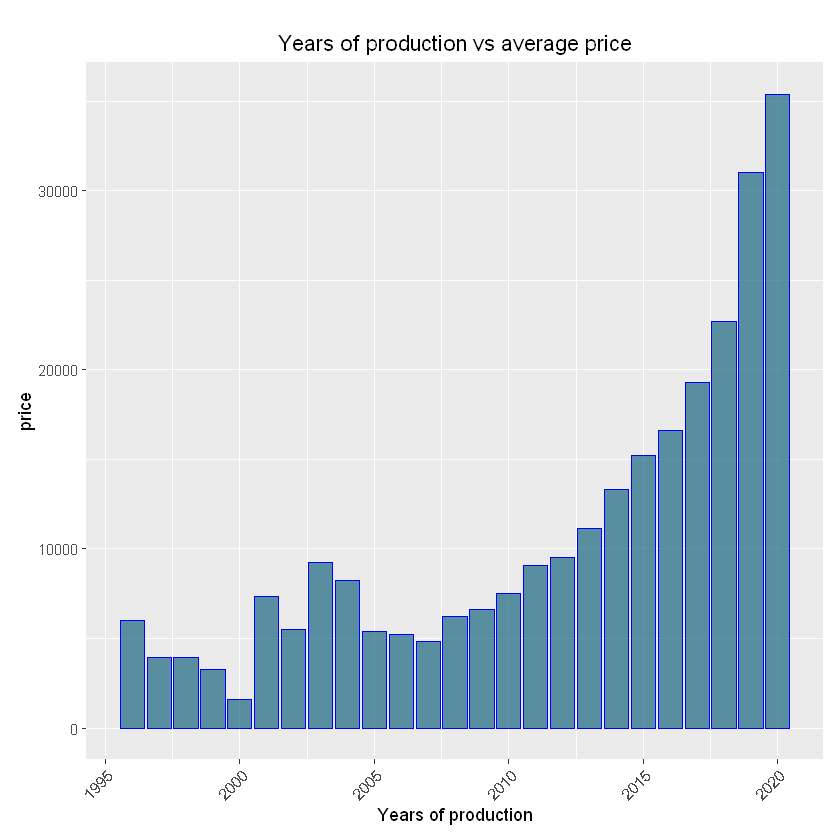

In [7]:
d <- setNames(aggregate(data[, 3], list(data$model), mean), c('model', 'avg_price'))

plot1 <- ggplot(d, aes(x=model, y=avg_price)) +
    geom_bar(stat="identity", color="blue", fill=rgb(0.1,0.4,0.5,0.7)) +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust = 1),
          plot.margin = margin(t = 20, r = 10, b = 10, l = 10)) +
    xlab('BMW models') +
    ylab('price') +
    ggtitle('BMW model vs average price') +
    theme(plot.title = element_text(hjust = 0.5))
plot1

d <- setNames(aggregate(data[, 3], list(data$year), mean), c('year', 'avg_price'))
plot2 <- ggplot(d, aes(x=year, y=avg_price)) +
    geom_bar(stat="identity", color="blue", fill=rgb(0.1,0.4,0.5,0.7)) +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust = 1),
          plot.margin = margin(t = 20, r = 10, b = 10, l = 10)) +
    xlab('Years of production') +
    ylab('price') +
    ggtitle('Years of production vs average price') +
    theme(plot.title = element_text(hjust = 0.5))
plot2

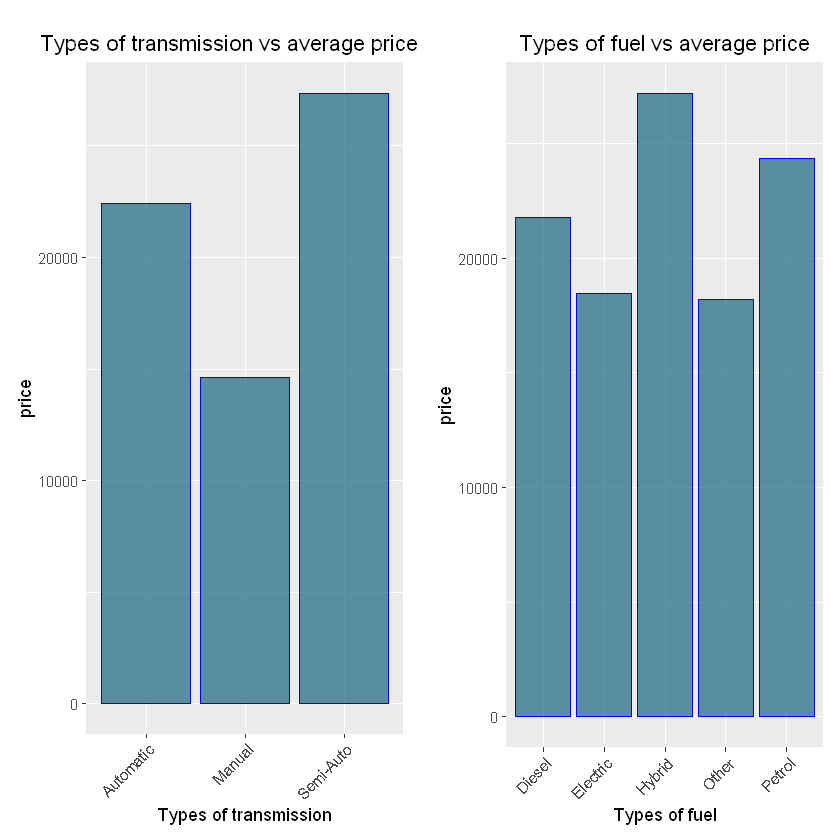

In [11]:
d <- setNames(aggregate(data[, 3], list(data$transmission), mean), c('transmission', 'avg_price'))

t <- ggplot(d, aes(x=transmission, y=avg_price)) +
    geom_bar(stat="identity", color="blue", fill=rgb(0.1,0.4,0.5,0.7)) +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust = 1),
          plot.margin = margin(t = 20, r = 10, b = 10, l = 10)) +
    xlab('Types of transmission') +
    ylab('price') +
    ggtitle('Types of transmission vs average price') +
    theme(plot.title = element_text(hjust = 0.75))

d <- setNames(aggregate(data[, 3], list(data$fuelType), mean), c('fuelType', 'avg_price'))
f <- ggplot(d, aes(x=fuelType, y=avg_price)) +
    geom_bar(stat="identity", color="blue", fill=rgb(0.1,0.4,0.5,0.7)) +
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust = 1),
          plot.margin = margin(t = 20, r = 10, b = 10, l = 10)) +
    xlab('Types of fuel') +
    ylab('price') +
    ggtitle('Types of fuel vs average price') +
    theme(plot.title = element_text(hjust = 0.5))
grid.arrange(t, f, nrow = 1)

__Inference:__

1. The newest models are of course the most expensive.
2. There are a couple models with the highest average price.
3. Semi-auto type of transmission is the most expensive, the most cars of that type are also available in the dataset.
4. The hybrid vehicles have the biggest average price.

According to the year of production, I will try to modify the column to have less categories.

In [10]:
cut_vehicle_year <- cut(data$year, breaks=c(1995, 2012, 2017, 2021),
                       labels=c('1996-2012 (old)', '2013-2017 (middle-aged)', '2018-2020 (new)'))
new_data <- data.frame(data, cut_vehicle_year)
#head(new_data)

__Visualising numerical data:__

- mileage
- taxes
- mpg (fuel economy) 
- size of an engine

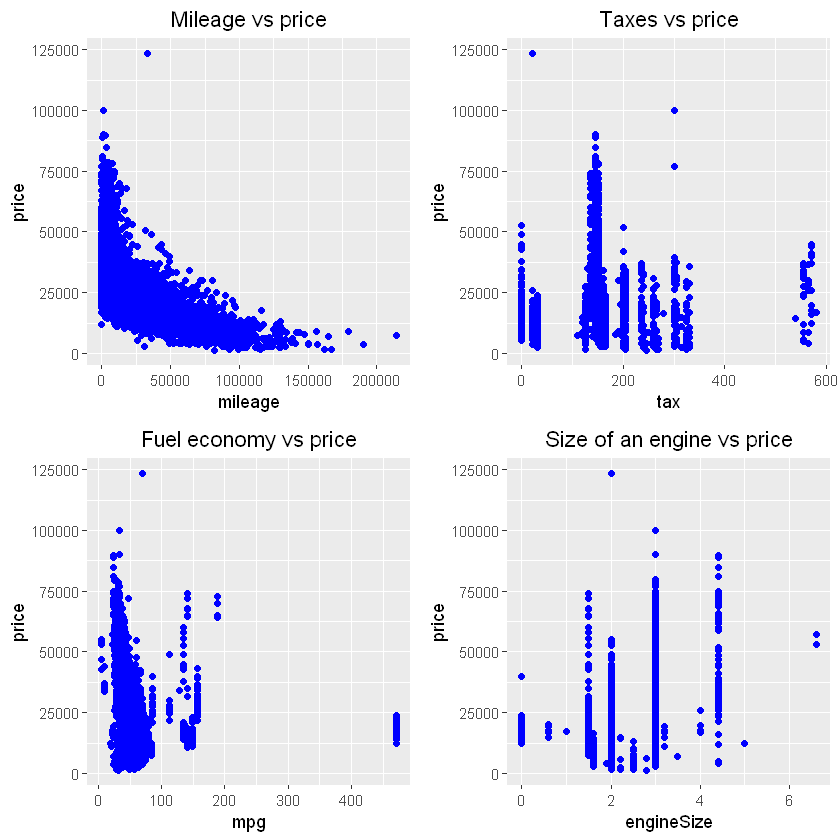

In [29]:
t1 <- ggplot(new_data, aes(x=mileage, y=price)) + geom_point(color='blue') + ggtitle('Mileage vs price') + 
                                                  theme(plot.title = element_text(hjust = 0.5))
t2 <- ggplot(new_data, aes(x=tax, y=price)) + geom_point(color='blue') + ggtitle('Taxes vs price') + 
                                              theme(plot.title = element_text(hjust = 0.5))
t3 <- ggplot(new_data, aes(x=mpg, y=price)) + geom_point(color='blue') + ggtitle('Fuel economy vs price') + 
                                              theme(plot.title = element_text(hjust = 0.5))
t4 <- ggplot(new_data, aes(x=engineSize, y=price)) + geom_point(color='blue') + ggtitle('Size of an engine vs price') + 
                                                     theme(plot.title = element_text(hjust = 0.5))
grid.arrange(t1, t2, t3, t4, nrow = 2)

__Inference:__

1. Mpg, engineSize and tax don't show any significant trend with price.
2. Mileage seems to have a significant negative correlation with price.

# Exploratory Data Analysis Summary <a class="anchor" id="exploratory-data-analysis-summary"></a>
The dataset is pretty big. Nevertheless there aren't significant issues with the dataset like wrong encoding of different features. I've decided to not remove any outliers because it doesn't seem to have any impact on prediction model like the cars produced in 1996. 

__List of significant variables after visual analysis:__

- year of production (new categorical type)
- type of transmission
- type of fuel
- mileage

In [11]:
model_data <- new_data[, c('cut_vehicle_year', 'transmission', 'fuelType', 'mileage', 'price')]
head(model_data)

cut_vehicle_year,transmission,fuelType,mileage,price
2013-2017 (middle-aged),Automatic,Diesel,67068,11200
2018-2020 (new),Automatic,Petrol,14827,27000
2013-2017 (middle-aged),Automatic,Diesel,62794,16000
2013-2017 (middle-aged),Automatic,Diesel,26676,12750
2013-2017 (middle-aged),Automatic,Diesel,39554,14500
2013-2017 (middle-aged),Automatic,Diesel,35309,14900


__Dummy variables__

In [13]:
library(fastDummies)
library(caret)
model_data_new <- dummy_cols(model_data, select_columns = c('cut_vehicle_year', 'transmission', 'fuelType'),
           remove_selected_columns = TRUE)
head(model_data_new)
dim(model_data_new)

mileage,price,cut_vehicle_year_1996-2012 (old),cut_vehicle_year_2013-2017 (middle-aged),cut_vehicle_year_2018-2020 (new),transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
67068,11200,0,1,0,1,0,0,1,0,0,0,0
14827,27000,0,0,1,1,0,0,0,0,0,0,1
62794,16000,0,1,0,1,0,0,1,0,0,0,0
26676,12750,0,1,0,1,0,0,1,0,0,0,0
39554,14500,0,1,0,1,0,0,1,0,0,0,0
35309,14900,0,1,0,1,0,0,1,0,0,0,0


[1] 10781    13

In [29]:
smp_size <- floor(0.75 * nrow(model_data_new))
set.seed(123)
train_ind <- sample(seq_len(nrow(model_data_new)), size=smp_size)

train <- model_data_new[train_ind, ]
test <- model_data_new[-train_ind, ]
#head(train)
normalize <- function(x, na.rm = TRUE) {
    return((x- min(x)) /(max(x)-min(x)))
}
train$mileage <- normalize(train$mileage)
train$price <- normalize(train$price)
#head(train)
colnames(train[3:5]) <- c('2018_2020', '2013_2017', '1996_2012')
#describe(train)

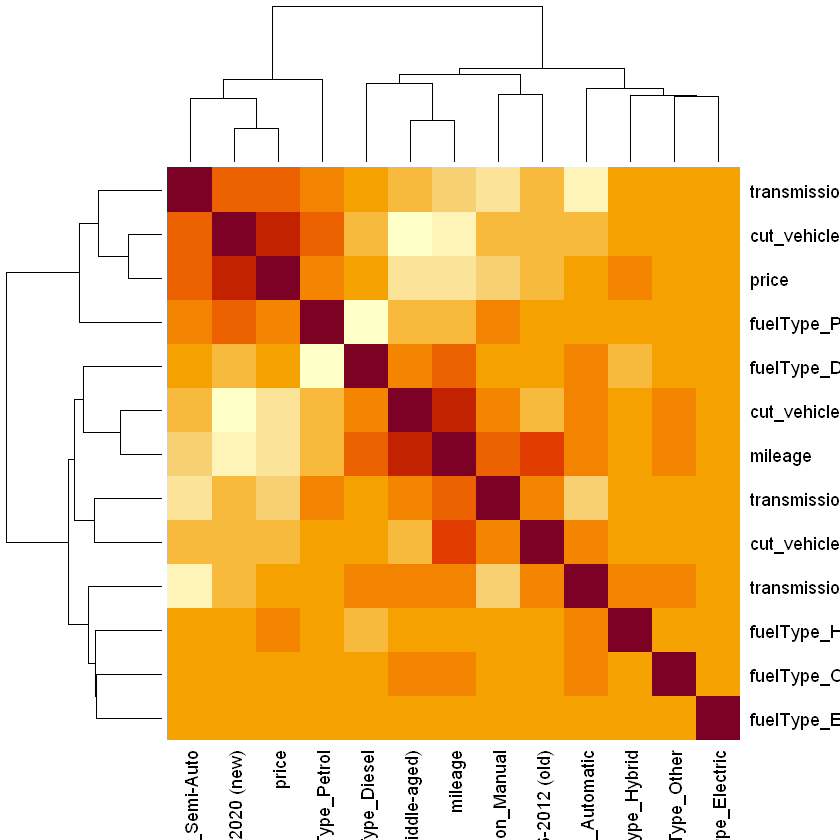

In [20]:
cormat<-signif(cor(train),2)
heatmap(cormat, symm=TRUE)

Highly correlated variables to price are:

- year_2018-2020 (new)
- transmission_semi_auto
- fuelType_Hybrid

# Model development <a class="anchor" id="model-development"></a>

In [30]:
#Training model

lmModel <- lm(price ~ ., data = train)
# Printing the model object
summary(lmModel)


Call:
lm(formula = price ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16130 -0.03597 -0.01070  0.01664  0.84764 

Coefficients: (3 not defined because of singularities)
                                            Estimate Std. Error t value
(Intercept)                                 0.249606   0.001555 160.477
mileage                                    -0.214083   0.008582 -24.944
`cut_vehicle_year_1996-2012 (old)`         -0.081158   0.005419 -14.976
`cut_vehicle_year_2013-2017 (middle-aged)` -0.066984   0.002106 -31.812
`cut_vehicle_year_2018-2020 (new)`                NA         NA      NA
transmission_Automatic                     -0.003698   0.001781  -2.076
transmission_Manual                        -0.055448   0.002017 -27.485
`transmission_Semi-Auto`                          NA         NA      NA
fuelType_Diesel                             0.007391   0.001658   4.457
fuelType_Electric                          -0.015246   0.038215  -0.399
fue

As we can see in this first model, there are a few missing values of coefficients. It means that there occur large __variance inflation factors__ in 3 groups of independent values: year of a vehicle, type of transmission and type of fuel. I can reject the variables which aren't significant based on T-test value:

- fuelType_Electric
- fuelType_Other
- transmission_Automatic (p-value lower than 0.05 but less significant that the other two variables in the same group of categorical data)

In [31]:
lmModel <- lm(price ~ `cut_vehicle_year_1996-2012 (old)` + `cut_vehicle_year_2018-2020 (new)` + transmission_Manual +
              `transmission_Semi-Auto` + fuelType_Hybrid + fuelType_Petrol + mileage, data = train)
# Printing the model object
summary(lmModel)


Call:
lm(formula = price ~ `cut_vehicle_year_1996-2012 (old)` + `cut_vehicle_year_2018-2020 (new)` + 
    transmission_Manual + `transmission_Semi-Auto` + fuelType_Hybrid + 
    fuelType_Petrol + mileage, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16129 -0.03593 -0.01074  0.01663  0.84764 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         0.186294   0.002433  76.580  < 2e-16 ***
`cut_vehicle_year_1996-2012 (old)` -0.014215   0.004685  -3.034 0.002418 ** 
`cut_vehicle_year_2018-2020 (new)`  0.067005   0.002104  31.846  < 2e-16 ***
transmission_Manual                -0.051763   0.002021 -25.606  < 2e-16 ***
`transmission_Semi-Auto`            0.003691   0.001777   2.077 0.037846 *  
fuelType_Hybrid                     0.016032   0.004602   3.484 0.000497 ***
fuelType_Petrol                    -0.007390   0.001657  -4.459 8.36e-06 ***
mileage                            -0.213924 

Now there is the problem with pretty high p-value for semi-auto type of transmission so I will try to remove the variable in a new, __final model__.

In [32]:
lmModel <- lm(price ~ `cut_vehicle_year_1996-2012 (old)` + `cut_vehicle_year_2018-2020 (new)` + transmission_Manual
              + fuelType_Hybrid + fuelType_Petrol + mileage, data = train)
# Printing the model object
summary(lmModel)


Call:
lm(formula = price ~ `cut_vehicle_year_1996-2012 (old)` + `cut_vehicle_year_2018-2020 (new)` + 
    transmission_Manual + fuelType_Hybrid + fuelType_Petrol + 
    mileage, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16022 -0.03638 -0.01080  0.01681  0.84956 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         0.188494   0.002191  86.050  < 2e-16 ***
`cut_vehicle_year_1996-2012 (old)` -0.014468   0.004684  -3.089 0.002017 ** 
`cut_vehicle_year_2018-2020 (new)`  0.067369   0.002097  32.124  < 2e-16 ***
transmission_Manual                -0.053619   0.001814 -29.565  < 2e-16 ***
fuelType_Hybrid                     0.015233   0.004587   3.321 0.000901 ***
fuelType_Petrol                    -0.007335   0.001658  -4.425 9.76e-06 ***
mileage                            -0.216338   0.008501 -25.449  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resi

__Residual analysis of model:__

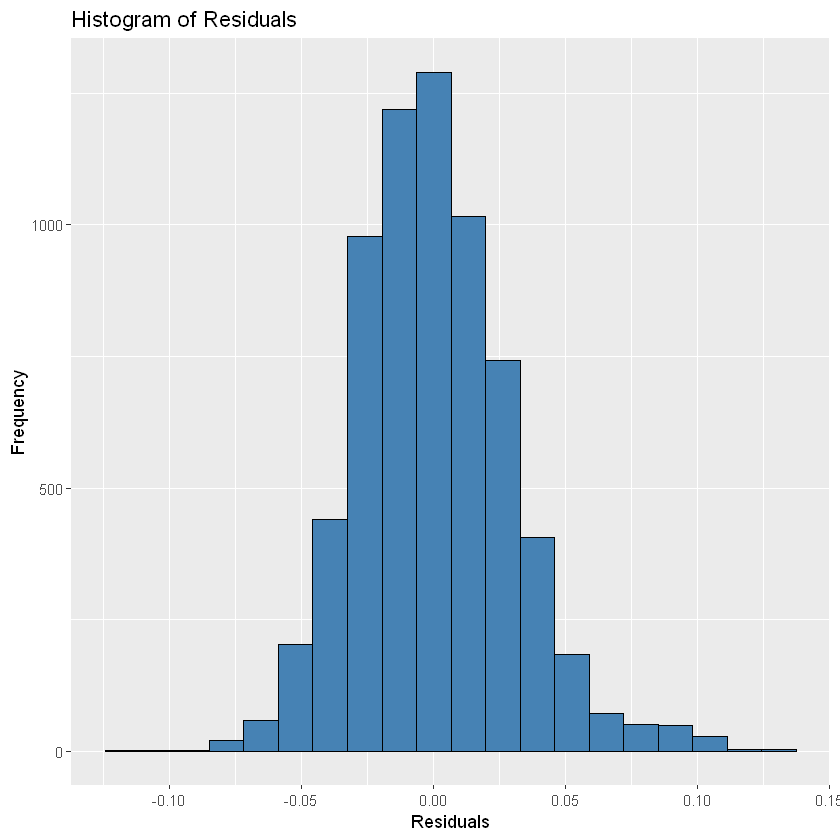

In [28]:
ggplot(data = train, aes(x = lmModel$residuals)) +
    geom_histogram(fill = 'steelblue', color = 'black', bins = 20) +
    labs(title = 'Histogram of Residuals', x = 'Residuals', y = 'Frequency')

Error terms seem to be approximately normally distributed, so the assumption on the linear modelling seems to be fulfilled.

__Prediction and evaluation:__

In [30]:
test$mileage <- normalize(test$mileage)
test$price <- normalize(test$price)
y_test <- test$price
x_test <- test[c(1,3:13)]

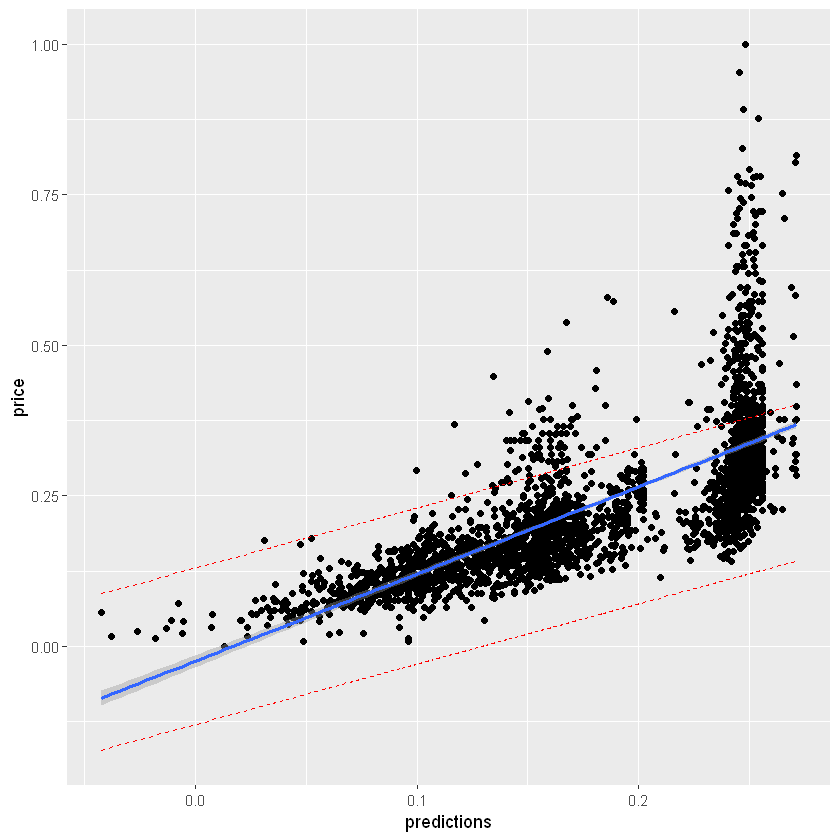

In [37]:
test$predictions <- predict(lmModel, x_test)
prediction <- predict(lmModel, x_test, interval="prediction")
p <- ggplot(test, aes(predictions, price)) +
  geom_point() +
  stat_smooth(method = lm)
p + geom_line(aes(y = as.data.frame(prediction)$lwr), color = "red", linetype = "dashed")+
    geom_line(aes(y = as.data.frame(prediction)$upr), color = "red", linetype = "dashed")

__Inference:__

1. R-sqaured and Adjusted R-squared - 0.5053 and 0.505 - 50,5% variance explained.
2. F-stats and Prob(F-stats) - 1375 and 2.2e-16 - Model is significant and explained 50% variance is just not by chance.
3. P-values of T-test for all the coefficients seem to be less than the significance level of 0.05 - meaning that all the predictors are statistically significant.
4. The multicollinearity in the model variables doesn't occur.

# Conclusion and recommendations <a class="anchor" id="conclusion-and-recommendations"></a>
The project aimed to investigate the price of used BMW cars on Polish market in a certain used car dealership which sells the vehicles. The results from the model can then be used to help identify a price of potential new BMW car in the company which will be the most attractive for customers and suppliers.

The built model fits the low and average valuable cars the most. As it can be seen on the last graph, the car priced to the point of 30% of price for the most valuable car in the dataset are fitted well in the regression model. It will be good probably for the most of used BMW cars available on the Polish market.

However, the model isn't perfect. For most of highly-priced cars occurs the huge difference between prediction and price. It is caused probably by lack of some information about luxury cars in the model.

The important features available in the given dataset which have an impact on the price of a car, except any other features outside the dataset are in general:

- year of production
- type of transmission
- type of fuel
- mileage.

The model explains over 50% of variance, that means that half of the data could fit the regression model. The model should be quite good for predicting values of low and average costs of certain cars. Unfortunately, for the most valuable, luxury cars for example could be dangerous - the fact that a car comes from luxury class should be take into account like any other features outside the tested dataset (for example the fact of front-end damage). The information given in the dataset may not be enough and it's important to keep in mind all the significant info about the vehicle put up for sale.

# References
- https://www.r-graph-gallery.com/218-basic-barplots-with-ggplot2.html
- http://www.sthda.com/english/articles/40-regression-analysis/166-predict-in-r-model-predictions-and-confidence-intervals/